Criação do arquivo com o labirinto otimizado

<Axes: >

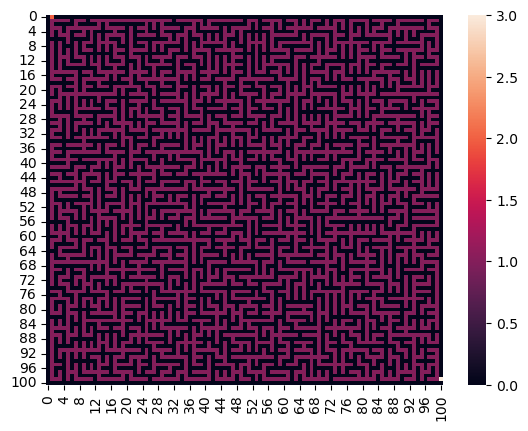

In [9]:
from pathlib import Path
import re
import seaborn as sns
import numpy as np

labirinto = []
with Path("../AlgoritmoGenetico/data/lab_lab.txt").open('r')  as f:
    for line in f.readlines():
        #line.replace("#..#","#.#")
        #[i-1 for i in range(30) if (i+1)%3!=1]
        arr = [1 if c =='.' else 0 for c in line]
        arr2 = [arr[i-1] for i in range(len(arr)) if (i+1)%3!=1 ]
        labirinto.append(arr2)
labirinto[0][1] = 2
labirinto[99][100] = 3
#labirinto = np.array(labirinto)
sns.heatmap(labirinto)

In [3]:
import pickle

In [10]:
with open('banana.txt', "w") as arquivo:
    # Converter a lista de listas em uma string formatada
    arquivo.write('[')
    for linha in labirinto:
        linha_formatada = repr(linha)
        arquivo.write(linha_formatada+',\n')
    # Escrever a string no arquivo
    arquivo.write(']')

In [11]:
from scripts.ambiente import Ambiente
from scripts.leitor import Leitor
from scripts.problems import Nrainhas, AlgebricFunction, FabricaDeRadios, Labirinto
from joblib import Parallel,delayed
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

#%load_ext autoreload
#%autoreload 2

In [12]:
config = Leitor().loadJson('data\labirinto100.json')
ambientes = [
    Ambiente(
        config=config,
        problem=Labirinto(),
        parallel=False,
    ) for _ in range(9)
]
def run(ambiente:Ambiente):
    ambiente.run()
    return ambiente

ambientes = Parallel(n_jobs=-1)(
    delayed(run)(ambiente) for ambiente in ambientes
)

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(12,10))
for i in range(3):
    for j in range(3):
        aux_ambiente = ambientes[i +3*j]
        best = problem.decode(aux_ambiente.elite_population[0])
        matrix = problem.get_matrix(best)
        sns.heatmap(matrix,ax=axes[i][j])
        #frase = 'Execução #'+str(j+1)

plt.tight_layout()